In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Upload data

In [3]:
CellName="F"
Day="19"
Month="10"
Year="23"
CellNum="0000"

DataFileName= CellName+Day+Month+Year+"_"+CellNum+"_IV.csv"

uploaded_csv_filename = DataFileName
data_frame = pd.read_csv(uploaded_csv_filename)
data_array = data_frame.to_numpy()

In [4]:
import pandas as pd
import numpy as np

uploaded_csv_filename = DataFileName  # Replace 'DataFileName' with your file name
data_frame = pd.read_csv(uploaded_csv_filename)
data_array = data_frame.to_numpy()

# Process each element in data_array, filtering out empty strings
max_split_length = max(len(row[0].split(';')) for row in data_array)
numeric_values = np.zeros((len(data_array), max_split_length))

for i, row in enumerate(data_array):
    split_values = [val for val in row[0].split(';') if val]  # Filter out empty strings
    numeric_values[i, :len(split_values)] = [float(val) for val in split_values]

In [5]:
voltage=[]
current_peak=[]
for row in numeric_values:
    voltage.append(row[0])
    current_peak.append(row[1])

Entonces el siguiente paso de la tarea, es calcular la conductancia a Casa potencial
La manera mas justa es haciendo una regresión lineal de los puntos entre 0 y 40 para garantizar que es un pedazo linear
Ese es el potencial de reversión práctico
La idea es calcular en esa recta cuando la corriente es 0
Cuando hagas eso, luego calculas las conductancias con los datos que hay de cada potencial
y el potencial que en cambio de ser -110, es -110.29
pero eso es practicamente-110, el problema y lo importante de tener y guardar esos valores, es si algo en el analisis sale mal
porque puede que uno accidentalmente conecto un cable que hizo que entrara la mitad del voltaje y en cambio de fijar tu celula al potencial que era terminaste poniendo menos etc... en este caso las cosas estan bien
entonces la idea es que con la parte lineal de los potenciales a positivo, calcules el potencial de reversion haciendo una regresion lineal

In [6]:
#Find zero
current_neg_vol= current_peak[0:2]

voltage_40=[]
current_peak_40=[]
i=0

for value in voltage:
    if value>0:
        voltage_40.append(value)
        current_peak_40.append(current_peak[i])
    i=1+i


#plt.plot(voltage_40,current_peak_40)


min_abs_current, min_current= min((abs(current), current) for current in current_peak)
min_current_ind=current_peak.index(min_current)



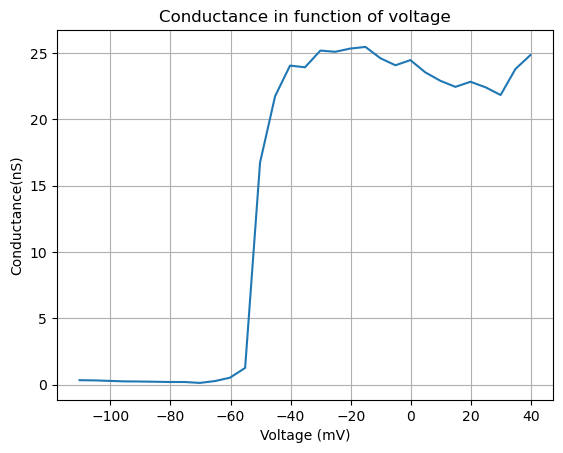

In [37]:
#Linear regression
coefficients = np.polyfit(voltage_40, current_peak_40, 1)  # 1 indicates linear (degree 1) fit
slope,y_cross=coefficients
# Create the line equation based on the coefficients
line = np.poly1d(coefficients)

def reversal_potential(y):
    x = (y-y_cross)/slope
    return x

# line_x = np.linspace(min(voltage_40), max(voltage_40), 100)
line_x = np.linspace(min(voltage_40), reversal_potential(0)+10, 100)
line_y = line(line_x)

conductance= np.array(list(abs(current_peak[i])/(reversal_potential(0)- voltage[i]) for i in range(len(current_peak)))) #I/FM

plt.plot(voltage,conductance)
plt.xlabel('Voltage (mV)')
plt.ylabel('Conductance(nS)')
plt.title('Conductance in function of voltage')
plt.grid(True)
plt.show()


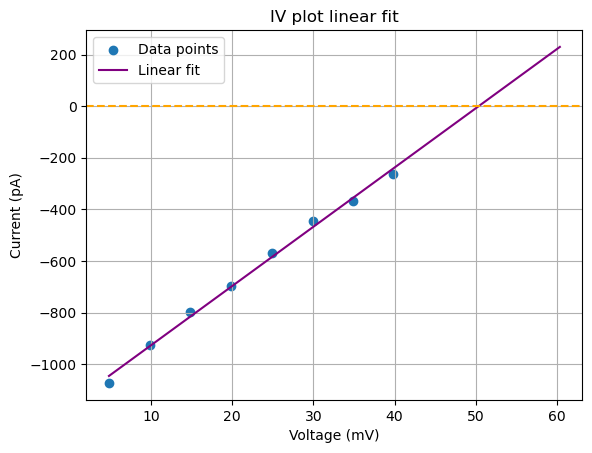

In [8]:
# Plotting
plt.scatter(voltage_40, current_peak_40, label='Data points')
plt.plot(line_x, line_y, color='purple', label='Linear fit')
plt.xlabel('Voltage (mV)')
plt.ylabel('Current (pA)')
plt.legend()
plt.axhline(0, color='orange', linestyle='--', label='Y=0')  # Add a red horizontal line at y=0
plt.title('IV plot linear fit')
plt.grid(True)
plt.show()

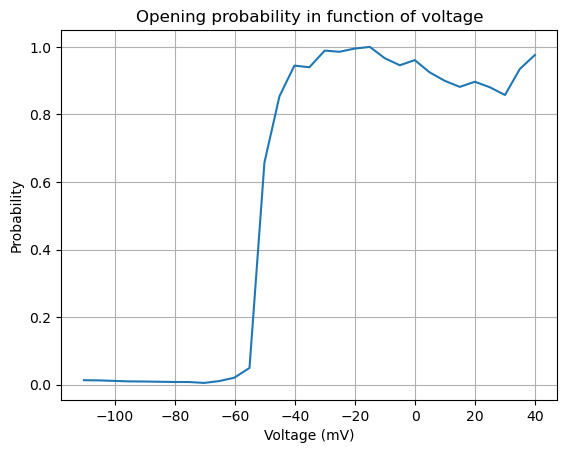

In [40]:
conductance_norm= conductance/max(conductance) #I/FM

plt.plot(voltage,conductance_norm)
plt.xlabel('Voltage (mV)')
plt.ylabel('Probability')
plt.title('Opening probability in function of voltage')
plt.grid(True)
plt.show()